In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from datetime import datetime
from collections import Counter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Data
data=pd.read_csv(r"/content/drive/MyDrive/training.1600000.processed.noemoticon.csv",encoding="Latin 1",header=None)

In [ ]:
#MAing a copy of data
data1=data.copy()

In [ ]:
data1.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#Renaming columns
data1.rename(columns={0:"Target",1:"Id's",2:"Date",3:"Flag",4:"User",5:"Text"},inplace=True)

In [ ]:
#Finding if the data contains any null values
data1.isnull().sum()

Target    0
Id's      0
Date      0
Flag      0
User      0
Text      0
dtype: int64

In [ ]:
data1.shape

(1600000, 6)

In [ ]:
data1.head()

,Target,Id's,Date,Flag,User,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Target  1600000 non-null  int64 
 1   Id's    1600000 non-null  int64 
 2   Date    1600000 non-null  object
 3   Flag    1600000 non-null  object
 4   User    1600000 non-null  object
 5   Text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
#data1["Target"]=data1["Target"].astype(object)
data1["Id's"]=data1["Id's"].astype(object)

In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1["Target"].value_counts()

0    800000
4    800000
Name: Target, dtype: int64

In [ ]:
data1["Target"]=data1["Target"].map({0:"Negative",4:"Positive"})

In [ ]:
data1["Target"].value_counts()

Negative    800000
Positive    800000
Name: Target, dtype: int64

In [ ]:
#data1["Date"]=pd.to_datetime(data1["Date"])

In [ ]:
#data1["DATE"]=data1["Date"].dt.strftime("%a %b %d %H:%M:%S %Y")

In [ ]:
#data1["Time"]=data1["DATE"].dt.strftime("%H:%M:%S")

# EDA

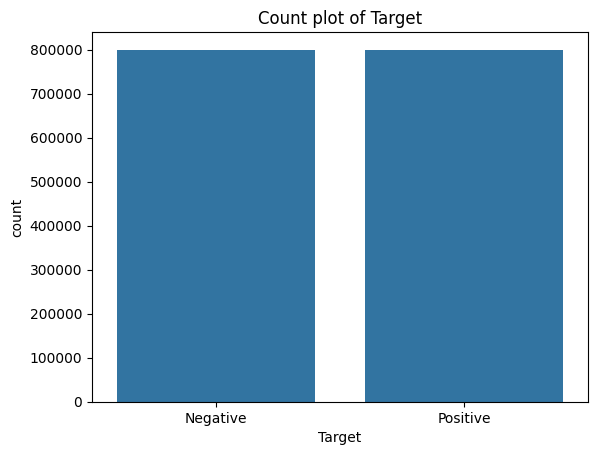

In [ ]:
sns.countplot(data=data1,x="Target")
plt.title("Count plot of Target")
plt.show()

In [ ]:
#sns.countplot(data=data1,x="Date")

<Axes: xlabel='Flag', ylabel='count'>

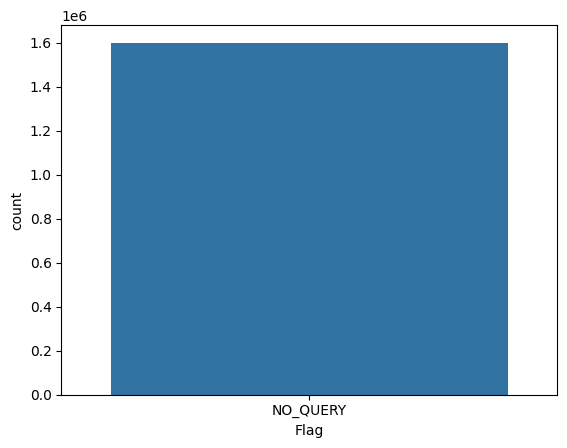

In [ ]:
sns.countplot(data=data1,x="Flag")

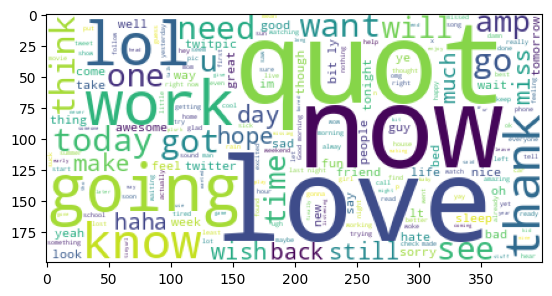

In [ ]:
text=" ".join(i for i in data1["Text"])
wordcloud=WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud)
plt.show()

In [ ]:
grp=data1.groupby("Target")

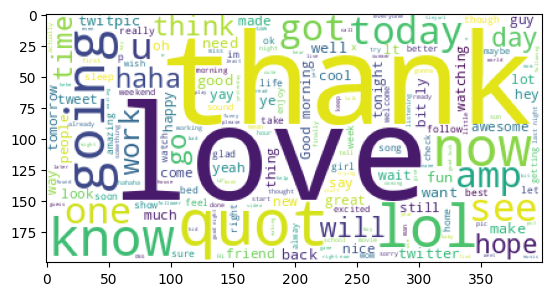

In [ ]:
text=" ".join(i for i in grp.get_group("Positive")["Text"])
wordcloud=WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud)
plt.show()

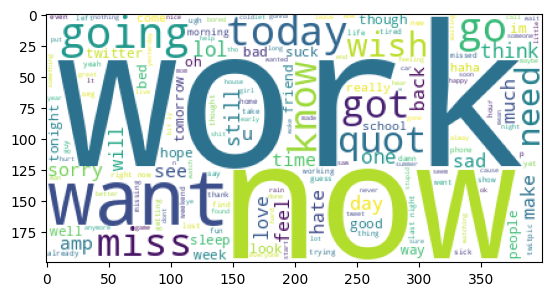

In [ ]:
text=" ".join(i for i in grp.get_group("Negative")["Text"])
wordcloud=WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud)
plt.show()

In [17]:
#Data Cleaning
#Defining a function if the data conatains any unwanred chhars or urls or numbers etc
def eda(data,name):
    case=" ".join(data[name]).islower()
    html=data[name].apply(lambda x : True if re.search("<.+?>",x) else False).sum()
    url=data[name].apply(lambda x : True if re.search("http[s]?://.+? +",x) else False).sum()
    unwanted=data[name].apply(lambda x : True if re.search("[]()!@#$%^&*?,<>.;:0-9]",x) else False).sum()
    if case == False:
        print(name,"not in lower case")
    if html>0:
        print("Have tags")
    if url>0:
        print("have urls")
    if unwanted >0:
        print("have unwanted chars")
    else:
        print("Data is clean")

In [18]:
import re
eda(data1,"Text")

NameError: name 'data1' is not defined

In [ ]:
#Advanced Text Preprocessing
def edat(x):

    x=x.lower()

    x=re.sub("<.+?>"," ",x)
    x=re.sub("http[s]?:/.+? +","",x)
    x=re.sub("[][:()*\-!_?/><;+.'/"",@#$%^&0-9]"," ",x)

    return x

In [ ]:
data1["Text"]=data1["Text"].apply(edat)

In [ ]:
eda(data1,"Text")

Data is clean


In [ ]:
data2=data1.copy()

In [ ]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stp=stopwords.words("english")
stp.remove("not")

In [ ]:
#Defining a function to chec stopwords in data
def stop(data,name):
  s=0
  stp=stopwords.words("english")
  for words in data[name]:
      for word in word_tokenize(words):
          if word in stp:
              s+=1
          else:
              s+=0
  if s>0:
        print("Stop words in data")
  else:
        print("no Stop words")

In [ ]:
stop(data2,"Text")

Stop words in data


In [ ]:
#Defining a function to remove stopwords
def stp1(x):
   l=[]
   for word in word_tokenize(x):

          if word in stp:
             pass
          elif len(word)<=2:
             pass
          else:
            l.append(word)
   return " ".join(l)

In [ ]:
#Removing Stopwords
data2["Text"]=data2["Text"].apply(stp1)

In [ ]:
data2.to_csv(r"/content/drive/MyDrive/data2.csv",index=False)

In [4]:
data2=pd.read_csv(r"/content/drive/MyDrive/data2.csv")

In [6]:
data2

,Target,Id's,Date,Flag,User,Text
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww bummer shoulda got david carr ...
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save re...
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass not behaving mad see
...,...,...,...,...,...,...
1599995,Positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke school best feeling ever
1599996,Positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com cool hear old walt interviews http ...
1599997,Positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask details
1599998,Positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy birthday boo alll time tupac amaru shakur


In [7]:
data2.isnull().sum()

Target      0
Id's        0
Date        0
Flag        0
User        0
Text      754
dtype: int64

In [23]:
data2.dropna(inplace=True)

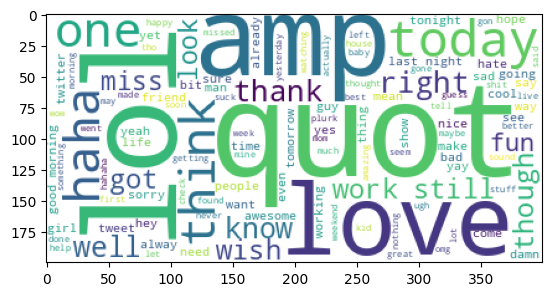

In [24]:
#Wordcloud for Text column
text=" ".join(i for i in data2["Text"])
wordcloud=WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud)
plt.show()

In [25]:
grp1=data2.groupby("Target")

In [26]:
#Most commom 20 words appeared in Texxt where the sentiment is positive
Counter(" ".join(grp1.get_group("Positive")["Text"]).split()).most_common(20)

[('good', 62124),
 ('day', 48337),
 ('love', 47847),
 ('quot', 45922),
 ('like', 37529),
 ('get', 36572),
 ('lol', 36084),
 ('not', 34541),
 ('thanks', 34519),
 ('got', 32036),
 ('going', 30937),
 ('time', 30438),
 ('today', 30072),
 ('new', 26962),
 ('one', 26834),
 ('amp', 26283),
 ('see', 25824),
 ('know', 25746),
 ('great', 25313),
 ('back', 23880)]

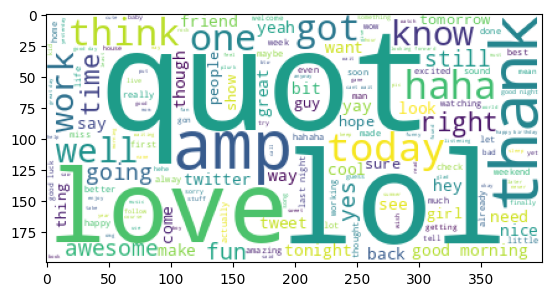

In [27]:
text=" ".join(i for i in grp1.get_group("Positive")["Text"])
wordcloud=WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud)
plt.show()

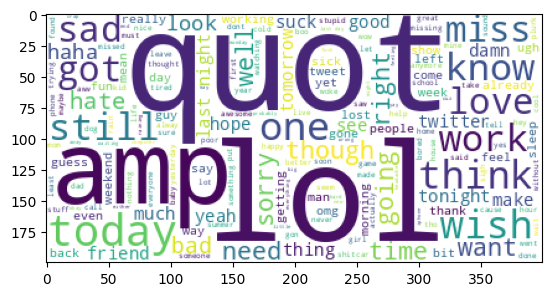

In [28]:
text=" ".join(i for i in grp1.get_group("Negative")["Text"])
wordcloud=WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud)
plt.show()

In [29]:
#Most commom 20 words appeared in Texxt where the sentiment is negative
Counter(" ".join(grp1.get_group("Negative")["Text"]).split()).most_common(20)

[('not', 76918),
 ('get', 45621),
 ('work', 45465),
 ('day', 41463),
 ('like', 41064),
 ('got', 38719),
 ('today', 38110),
 ('going', 33693),
 ('back', 33092),
 ('really', 31506),
 ('miss', 31073),
 ('want', 29871),
 ('still', 29265),
 ('good', 29213),
 ('sad', 27902),
 ('time', 27528),
 ('one', 27354),
 ('know', 26313),
 ('quot', 26168),
 ('home', 24551)]

In [30]:
data2["Word_count"]=data2["Text"].apply(lambda x:len(x.split()))

In [31]:
data2

,Target,Id's,Date,Flag,User,Text,Word_count
0,Negative,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot awww bummer shoulda got david carr ...,9
1,Negative,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...,11
2,Negative,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan dived many times ball managed save re...,9
3,Negative,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,6
4,Negative,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass not behaving mad see,5
...,...,...,...,...,...,...,...
1599995,Positive,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,woke school best feeling ever,5
1599996,Positive,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdb com cool hear old walt interviews http ...,10
1599997,Positive,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,ready mojo makeover ask details,5
1599998,Positive,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy birthday boo alll time tupac amaru shakur,8


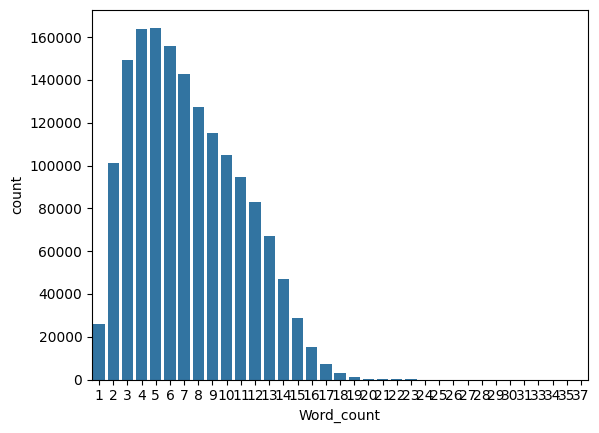

In [33]:
sns.countplot(data=data2,x="Word_count")
plt.show()